In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import itertools
import numpy as np
df = pd.read_csv('DATASET_F5.csv')
X = df[['feature 1 ',' feature 2 ',' feature 3 ',' feature 4',' feature 5',' feature 6']]
y = df[' result']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## SVM

In [2]:
clf = svm.SVC()
df[' result'].value_counts()

0    1130
1    1067
Name:  result, dtype: int64

In [3]:
%%time
clf.fit(X_train, y_train)

Wall time: 58.8 ms


SVC()

In [4]:
%%time
y_pred = clf.predict(X_test)

Wall time: 9.98 ms


In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       233
           1       0.78      0.87      0.82       207

    accuracy                           0.82       440
   macro avg       0.82      0.82      0.82       440
weighted avg       0.83      0.82      0.82       440



In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.77682403 0.22317597]
 [0.13043478 0.86956522]]


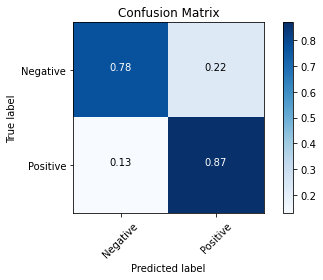

In [7]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Negative','Positive'], title='Confusion Matrix')

## KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

In [9]:
%%time
knn.fit(X_train, y_train)

Wall time: 4.99 ms


KNeighborsClassifier(n_neighbors=3)

In [10]:
y_test = knn.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       231
           1       0.82      0.91      0.87       209

    accuracy                           0.87       440
   macro avg       0.87      0.87      0.87       440
weighted avg       0.87      0.87      0.87       440



Normalized confusion matrix
[[0.82251082 0.17748918]
 [0.0861244  0.9138756 ]]


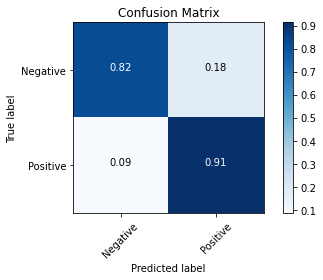

In [12]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Negative','Positive'], title='Confusion Matrix')